<a href="https://colab.research.google.com/github/Darsangmdd/Analysis-of-Forbes-Billionaire-s-2021/blob/main/Forbes_Billionaries.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **ANALYSIS OF FORBES BILLIONAIRE'S 2021 **

In [105]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline  
import seaborn as sns
pd.set_option('display.max_rows', 500) 

dataset = pd.read_csv('forbes_billionaires.csv')
dataset.head()

,Name,NetWorth,Country,Source,Rank,Age,Residence,Citizenship,Status,Children,Education,Self_made
0,Jeff Bezos,177.0,United States,Amazon,1,57.0,"Seattle, Washington",United States,In Relationship,4.0,"Bachelor of Arts/Science, Princeton University",True
1,Elon Musk,151.0,United States,"Tesla, SpaceX",2,49.0,"Austin, Texas",United States,In Relationship,7.0,"Bachelor of Arts/Science, University of Pennsy...",True
2,Bernard Arnault & family,150.0,France,LVMH,3,72.0,"Paris, France",France,Married,5.0,"Bachelor of Arts/Science, Ecole Polytechnique ...",False
3,Bill Gates,124.0,United States,Microsoft,4,65.0,"Medina, Washington",United States,Divorced,3.0,"Drop Out, Harvard University",True
4,Mark Zuckerberg,97.0,United States,Facebook,5,36.0,"Palo Alto, California",United States,Married,2.0,"Drop Out, Harvard University",True


In [106]:
dataset.isnull().sum()

Name              0
NetWorth          0
Country           0
Source            0
Rank              0
Age             125
Residence        40
Citizenship      16
Status          665
Children       1203
Education      1346
Self_made        18
dtype: int64

In [107]:
dataset.duplicated().sum()
dataset.shape

(2755, 12)

1. Which sector has the most number of billionaires?


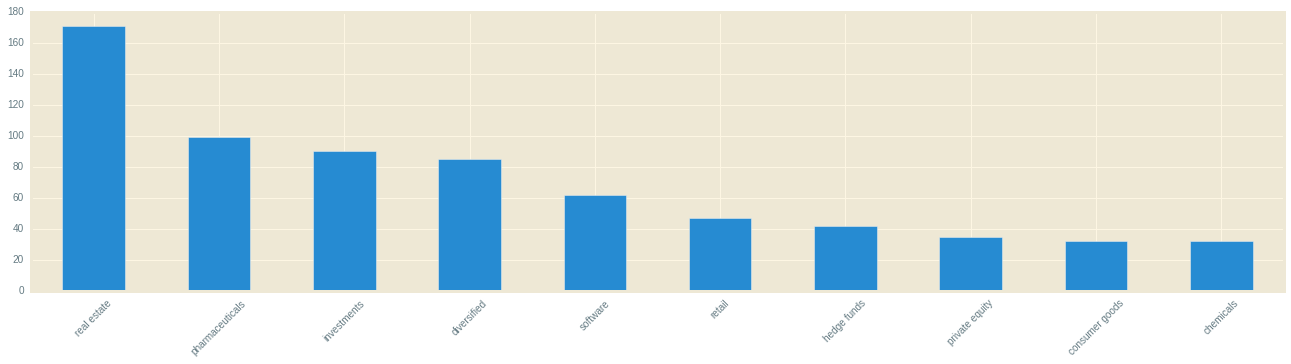

In [108]:
dataset['Source'].value_counts().head(10)
plt.figure(figsize=(20,5))
plt.style.use('Solarize_Light2')
dataset.groupby('Source')['Source'].count().sort_values(ascending = False).head(10).plot.bar()
plt.xticks(rotation = 45)
plt.xlabel('')
plt.show()

2. Relationship between net worth and number of children they possess?

In [109]:
dataset['NetWorth'].corr(dataset['Children'])

0.053064135762234274

***### NO SIGNIFICANT RELATIONSHIP FOUND!***

In [110]:
dataset.isnull().sum()

Name              0
NetWorth          0
Country           0
Source            0
Rank              0
Age             125
Residence        40
Citizenship      16
Status          665
Children       1203
Education      1346
Self_made        18
dtype: int64

3. Is a college required to become a billionaire? 

In [111]:
dataset['Education'].fillna("Unknown",inplace=True)
dataset['Education'].isnull().sum()
'Bachelor' in dataset['Education'][0].split()

True

In [112]:
dataset['Education']
Masters = 0
Bachelors = 0
PhD = 0 
drop_out = 0
Others = 0
Unknown = 0
for i in dataset['Education']:
  if 'Ph.D' in i or 'Doctorate' in i:
    PhD +=1 
  elif 'Master' in i or 'MBA' in i:
    Masters +=1
  elif 'Bachelor' in i:
   Bachelors +=1
  elif 'Drop Out' in i:
   drop_out +=1
  elif 'Unknown' in i:
    Unknown +=1
  else:
    Others +=1


print(" Percentage of Billionaire's who dropped out :", (drop_out/(2755-1346))*100)
print(" Percentage of Billionaire's who hold a Bachelor's degree :", (Bachelors/(2755-1346))*100)
print(" Percentage of Billionaire's who hold a Master's degree :", (Masters/(2755-1346))*100)
print(" Percentage of Billionaire's who hold a PhD :", (PhD/(2755-1346))*100)
print(" Percentage of Billionaire's who hold other degrees :", (Others/(2755-1346))*100)
print(" Percentage of Billionaire's whose degrees are not available :", (Unknown/(2755-1346))*100)

 Percentage of Billionaire's who dropped out : 5.180979418026969
 Percentage of Billionaire's who hold a Bachelor's degree : 47.480482611781405
 Percentage of Billionaire's who hold a Master's degree : 32.86018452803406
 Percentage of Billionaire's who hold a PhD : 7.026259758694109
 Percentage of Billionaire's who hold other degrees : 7.45209368346345
 Percentage of Billionaire's whose degrees are not available : 95.52874378992193


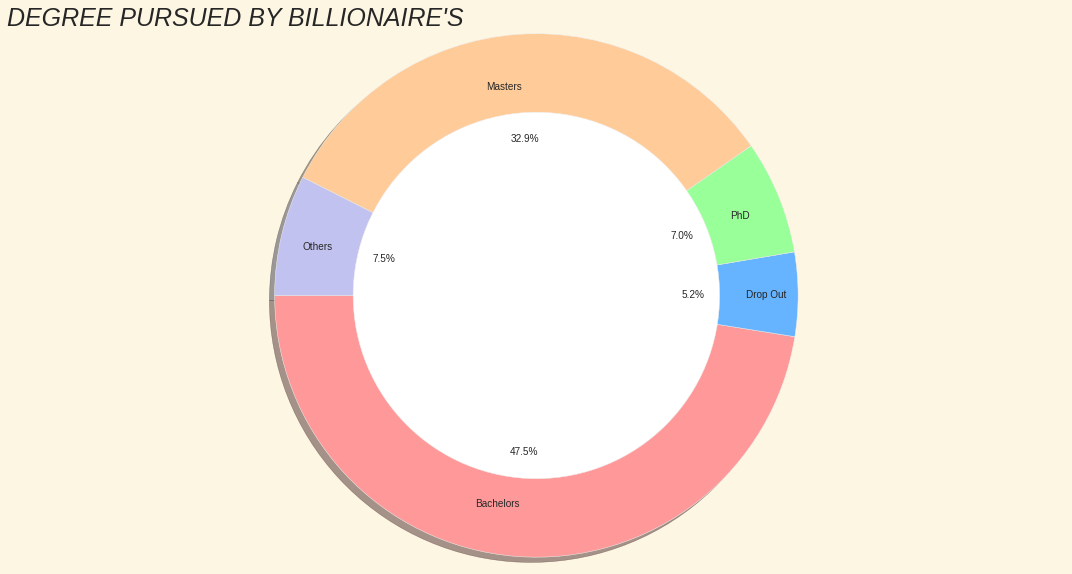

In [257]:
 sizes = [ (Bachelors/(2755-1346))*100, (drop_out/(2755-1346))*100  , (PhD/(2755-1346))*100, (Masters/(2755-1346))*100, (Others/(2755-1346))*100 ] 
 Labels = ['Bachelors', 'Drop Out','PhD','Masters','Others']
myexplode = [0,0.2,0,0,0]
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99','#c2c2f0']
fig, ax = plt.subplots(figsize=(15,8))
ax.pie(sizes,labels=Labels,autopct='%1.1f%%',colors = colors, startangle=180, shadow = True,labeldistance=0.8)
plt.title("DEGREE PURSUED BY BILLIONAIRE'S", loc="left",
          fontstyle='italic', fontsize = 25)
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
ax.axis('equal')
plt.tight_layout()
plt.show()

### ***FROM THIS WE INFER THAT A IT'S MORE LIKELY TO BECOME A BILLIONAIRE WITH A COLLEGE DEGREE***

4. Self-made vs Non-self made billionaire's

In [136]:
selfmade = dataset['Self_made'].value_counts()
selfmade

True     1960
False     777
Name: Self_made, dtype: int64

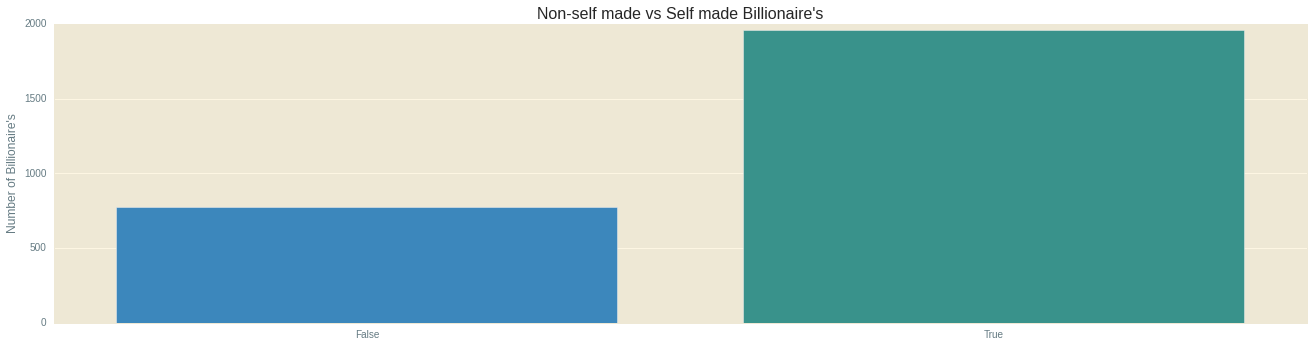

In [201]:
plt.figure(figsize=(20,5))
sns.set_palette("bright")
plt.style.use('Solarize_Light2')
g = sns.barplot(x=selfmade.index, y=selfmade.values)
g.set(title="Non-self made vs Self made Billionaire's")
g.set(xlabel = None)
plt.ylabel("Number of Billionaire's")
plt.show()

5. Where are the world's youngest billionaire's? 

In [117]:
data = dataset[dataset['Age']<=35][['Name','Age','Residence']]
data.sort_values(by='Age', inplace = True)
#data['Residence'].isnull().sum()
data.dropna(inplace=True)
#data.isnull().sum()
for i in data['Residence']:
  #print(i)
  print(i.split(',')[0])


Jiaozuo
Oslo
Oslo
Los Altos
MONTE VISTA
Kverva
San Francisco
Hong Kong
Hong Kong
Los Angeles
San Francisco
Sydney
Melsungen
Austin
Sao Paulo
Haderslev
Miami
San Francisco
Venice
Beijing
Almaty
Moscow
Shanghai
Denmark
Jackson
Palo Alto
Melsungen
Sydney
San Francisco
Beijing
Helsinki
Bal Harbour
New York
Joinville
London
Hong Kong


6. Number of billionaire's in each relationship category? 

In [134]:
relationship = dataset['Status'].value_counts()
relationship

Married               1734
Divorced               144
Widowed                 95
Single                  74
In Relationship         21
Separated               10
Widowed, Remarried       8
Engaged                  4
Name: Status, dtype: int64

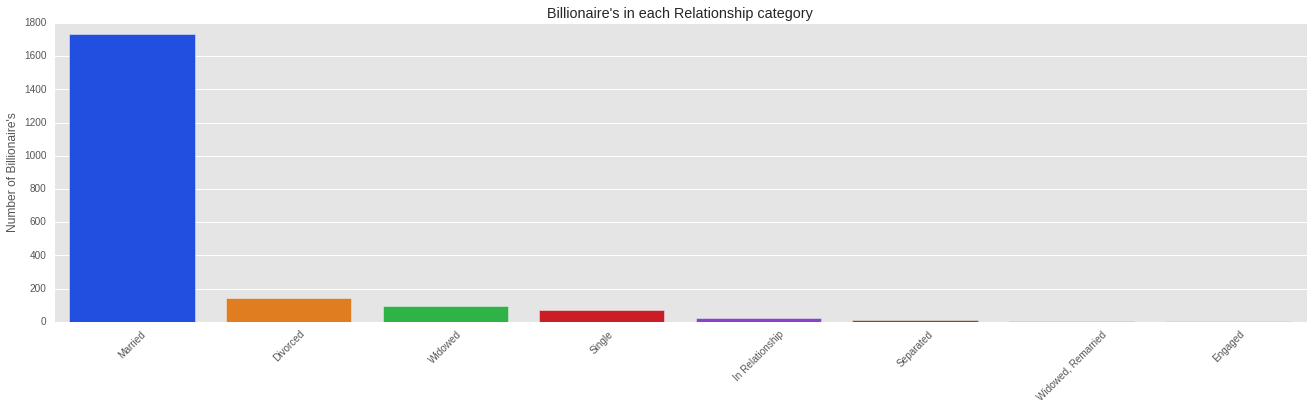

In [199]:
plt.figure(figsize=(20,5))
sns.set_palette("bright")
g = sns.barplot(x=relationship.index, y=relationship.values)
g.set(title="Billionaire's in each Relationship category")
g.set(xlabel = None)
plt.xticks(rotation = 45)
plt.ylabel("Number of Billionaire's")
plt.show()

7. How many billions are contributed by the billionaire's to a country? 

In [120]:
net_worth = dataset.groupby('Country')['NetWorth'].sum().sort_values(ascending = False).head(10)

Text(0, 0.5, 'Money in Billion Dollars')

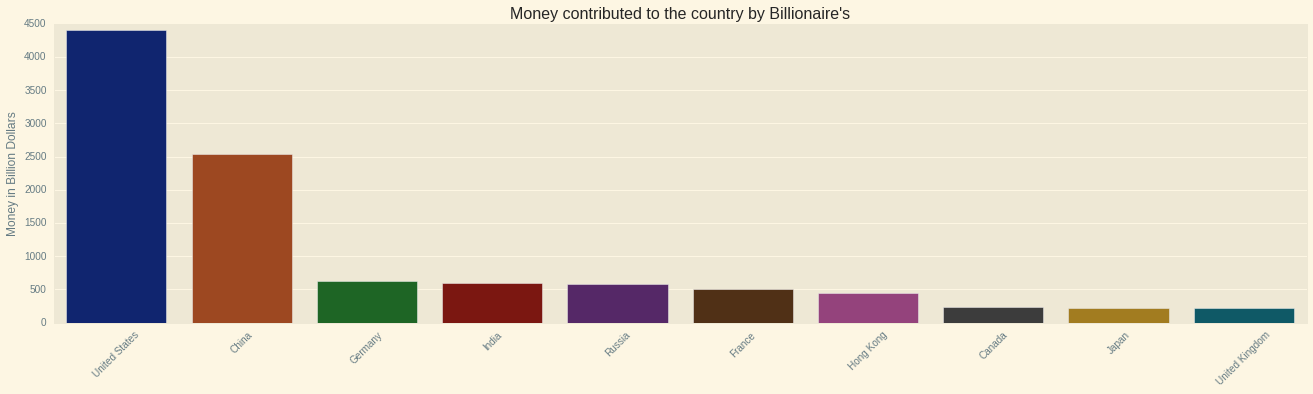

In [258]:
plt.figure(figsize=(20,5))
sns.set_palette("dark")
g = sns.barplot(x=net_worth.index, y=net_worth.values)
g.set(title="Money contributed to the country by Billionaire's")
g.set(xlabel = None)
plt.xticks(rotation = 45)
plt.ylabel('Money in Billion Dollars')

8. Which city has the most number of billionaire's in the US?

In [187]:
data = dataset.copy()
data['Residence']=data['Residence'].fillna('Unknown')
States = {}
data = data['Residence'][data['Country']=='United States']
data = data.to_frame()
#data.rename('Residence', axis=1)
for i in data['Residence']:
  c = i.split(',')
  if c[-1] in States:
    States[c[-1]] +=1
  else:
    States[c[-1]] = 1
sort_States = dict(sorted(States.items(),key=lambda x:x[1],reverse = True))

del sort_States['China']
del sort_States[' Singapore']
del sort_States[' China']
print(sort_States)
sum(sort_States.values())
k3 = dict(list(sort_States.items())[0: 10])

{' California': 169, ' New York': 115, ' Florida': 70, ' Texas': 64, ' Massachusetts': 24, ' Illinois': 22, ' Washington': 21, ' Nevada': 17, ' Pennsylvania': 16, ' Georgia': 14, ' Arizona': 12, ' Connecticut': 11, ' Tennessee': 11, ' Colorado': 11, ' Virginia': 9, 'Unknown': 9, ' Maryland': 9, ' Michigan': 8, ' Wisconsin': 8, ' Ohio': 8, ' New Jersey': 7, ' Oklahoma': 6, ' Missouri': 6, ' Arkansas': 5, ' Wyoming': 5, ' Nebraska': 4, ' Montana': 4, ' Minnesota': 4, ' Utah': 4, ' Hawaii': 3, ' United Kingdom': 3, ' Indiana': 3, ' North Carolina': 3, ' Oregon': 2, ' Kansas': 2, ' Hong Kong': 2, ' Kentucky': 2, ' South Korea': 2, ' Mississippi': 2, 'New Jersey': 1, ' Australia': 1, ' Iowa': 1, ' Louisiana': 1, ' Idaho': 1, ' South Dakota': 1, ' Maine': 1, ' Rhode Island': 1, ' South Carolina': 1, ' Switzerland': 1, ' New Mexico': 1}


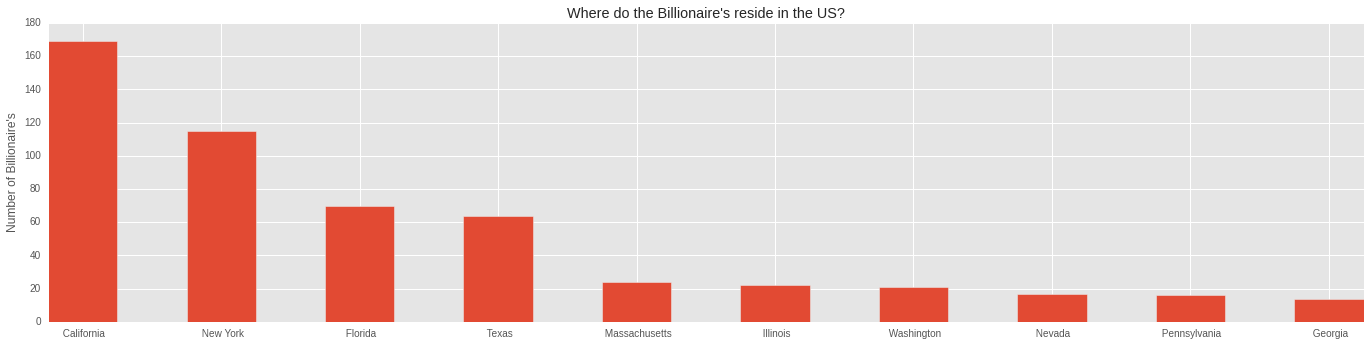

In [195]:
plt.style.use('ggplot')
plt.figure(figsize=(21,5))
plt.bar(*zip(*k3.items()), width =0.5)
plt.title("Where do the Billionaire's reside in the US?")
plt.ylabel("Number of Billionaire's")
plt.show()

9. How many billionaire families are there? 

In [124]:
families = 0 
for i in dataset['Name']:
  j = i.split('&')
  if j[-1] == ' family':
    families += 1 
  else:
    families = families 
print('The number of billionaire families are',families)

The number of billionaire families are 333


10. Top Billionaire producing schools? 

In [125]:
final_bachelor = {}
final_master = {}
for i in dataset['Education']:
  j=i.split(';')
  if len(j) == 1 and 'Bachelor' in j[0]:
    new = j[0].split(',')
    if new[-1] in final_bachelor:
      final_bachelor[new[-1]] +=1
    else:
      final_bachelor[new[-1]] = 1
  elif len(j) == 2 and 'Master' in j[0]:
    new = j[0].split(',')
    if new[-1] in final_master:
      final_master[new[-1]] +=1
    else:
      final_master[new[-1]] = 1
  elif len(j) == 2 and 'Master' in j[1]:
    new = j[1].split(',')
    if new[-1] in final_master:
      final_master[new[-1]] +=1
    else:
      final_master[new[-1]] = 1  
sort_bachelor = dict(sorted(final_bachelor.items(),key=lambda x:x[1],reverse = True))
k1 = dict(list(sort_bachelor.items())[0: 10]) 
sort_master = dict(sorted(final_master.items(),key=lambda x:x[1],reverse = True))
k2 = dict(list(sort_master.items())[0: 10]) 
print("Top 10 schools to earn your Bachelor's degree to become a billionaire in order",k1.keys())
print("Top 10 schools to earn your Master's degree to become a billionaire in order",k2.keys())

Top 10 schools to earn your Bachelor's degree to become a billionaire in order dict_keys([' Stanford University', ' Harvard University', ' The Wharton School', ' Yale University', ' University of Southern California', ' Bombay University', ' University of Washington', ' Delhi University', ' Cornell University', ' Sichuan University'])
Top 10 schools to earn your Master's degree to become a billionaire in order dict_keys([' Harvard Business School', ' Harvard University', ' Stanford Graduate School of Business', ' Stanford University', ' Columbia Business School', ' The Wharton School', ' Massachusetts Institute of Technology', ' Columbia University', ' Leonard N. Stern School of Business', ' Tsinghua University'])


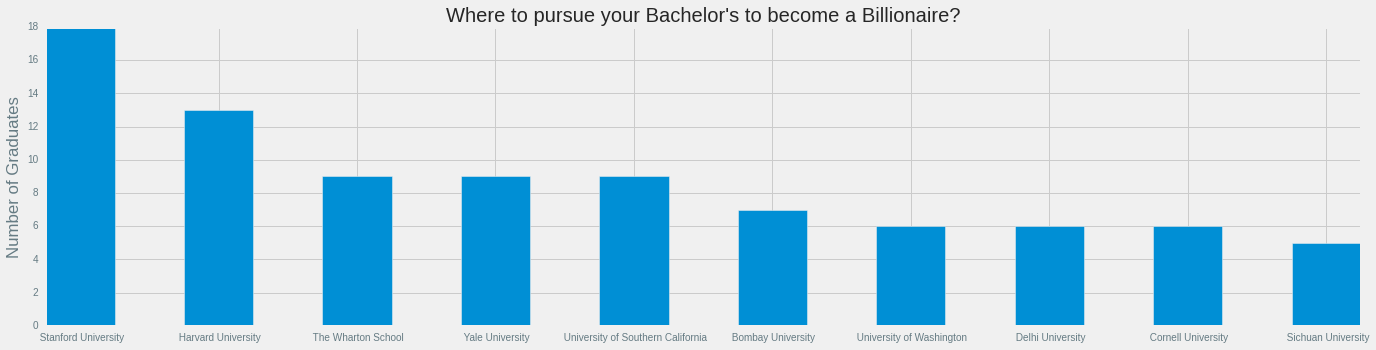

In [126]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(21,5))
plt.bar(*zip(*k1.items()), width =0.5)
plt.title("Where to pursue your Bachelor's to become a Billionaire?")
plt.ylabel('Number of Graduates')
plt.show()

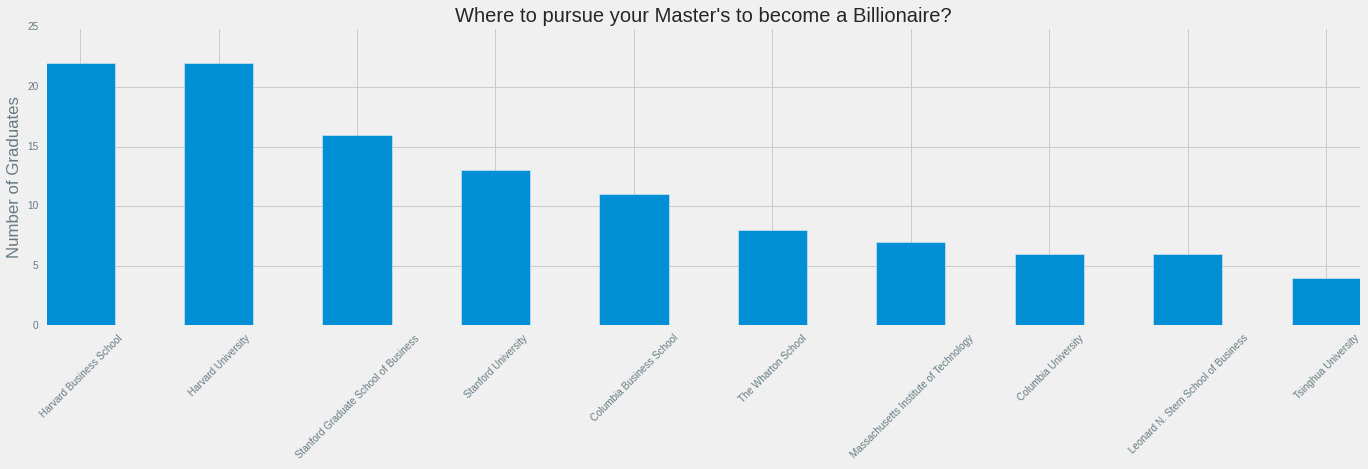

In [127]:
plt.figure(figsize=(21,5))
plt.bar(*zip(*k2.items()), width =0.5)
plt.title("Where to pursue your Master's to become a Billionaire?")
plt.ylabel('Number of Graduates')
plt.xticks(rotation =45)
plt.show()